Setting: 

In [1]:
#%pip install keras==2.5.0rc0 tensorflow==2.5.0
%pip install numpy
%pip install sklearn
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install umap
%pip install pycaret
%pip install scipy
%pip install warnings

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings
You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

import umap
#import umap.plot
from pycaret.classification import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

import scipy.stats as stats

Read datset:

In [3]:
card_Traindata = pd.read_csv('fraudTrain.csv')
card_Testdata = pd.read_csv('fraudTest.csv')

card_Traindata['split_label'] = 'train' 
card_Testdata['split_label'] = 'test'

In [4]:
trainLength = len(card_Traindata)
testLength = len(card_Testdata)
print('Number of records in the train dataset : ',trainLength)
print('Number of records in the test dataset : ',testLength)
print('Train vs Test ratio : ', 100 - 100*round(testLength/trainLength,1),'% : ',100*round(testLength/trainLength,1),'%')

Number of records in the train dataset :  1296675
Number of records in the test dataset :  555719
Train vs Test ratio :  60.0 % :  40.0 %


In [5]:
data = pd.concat([card_Traindata,card_Testdata], axis = 0)
data.shape

(1852394, 24)

In [6]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
split_label               object
dtype: object

Display fraud and legitimate transactions proportion

The colors variable is a list of two colors, 'gold' and 'mediumturquoise', that will be used to color the pie chart slices.
The labels variable is a list of two labels, 'Normal' and 'Fraud', that will be used to label the pie chart slices.
The values variable is created by counting the number of occurrences of each class in the Class column of the card_Traindata DataFrame and dividing it by the total number of rows in the DataFrame. This gives us the proportion of each class in the dataset.

The go.Figure() method creates a new figure with the specified data and layout.
data is a list containing a single go.Pie() trace that will be plotted on the figure. The Pie trace specifies the labels, values, and hole properties. The hole property specifies the size of the inner hole of the pie chart.

The update_traces() method is used to modify the properties of the trace(s) in the figure.
hoverinfo and textinfo specify the text that appears when you hover over and click on the pie chart slices, respectively.
textfont_size specifies the font size of the text that appears on the pie chart slices.
marker is a dictionary that specifies the color and border properties of the pie chart slices.

The update_layout() method is used to modify the layout of the figure.
title_text specifies the title of the figure.
title_font_color specifies the color of the title text.
legend_title_font_color specifies the color of the legend title.
paper_bgcolor and plot_bgcolor specify the background color of the paper (i.e., the space outside the plot area) and the plot area, respectively.
font_color specifies the color of the font used in the plot.

Finally, fig.show() displays the figure.

In [7]:
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Fraud']
values = data['is_fraud'].value_counts()/data['is_fraud'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

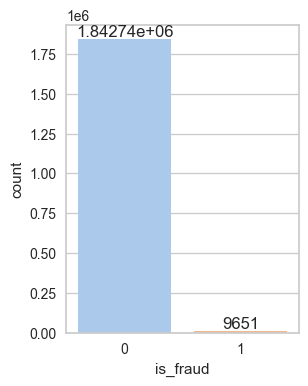

In [8]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x = 'is_fraud', data = data, palette = "pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [9]:
data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,split_label
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train


In [10]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
split_label              0
dtype: int64

Data preprocessing 
1- Handle duplicate data

In [11]:

print("the lentgh od the data befor droped dupuilcate data", len(data))

the lentgh od the data befor droped dupuilcate data 1852394


Type cast 'trans_date_trans_time' & 'dob' from object to datetime panda

In [12]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_date_trans_time'].head()

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06
Name: trans_date_trans_time, dtype: datetime64[ns]

In [13]:
data['dob'] = pd.to_datetime(data['dob'])
data['dob'].head()

0   1988-03-09
1   1978-06-21
2   1962-01-19
3   1967-01-12
4   1986-03-28
Name: dob, dtype: datetime64[ns]

ndexes/record id's
customer labels such as name, job ( job is highly cardinal cannot be grouped)
merchant labels such as merchant name
other categorical columns with high cadinalities which cannot be grouped / cannot be encoded

In [14]:
# list of columns to be dropped
drop_cols = ['Unnamed: 0','street','merchant','zip','first','last','trans_num','job'] 
data.drop(drop_cols, axis =1, inplace = True)

In [15]:
list(data.columns)

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'city',
 'state',
 'lat',
 'long',
 'city_pop',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'split_label']

Feature Extraction ( Arriving New Features )
5.1. Extract features from trans_date_trans_time
5.2. Extract features from unix_time
5.3. Extract features from dob
5.4. Extract features from merchant lat-long and card holder lat-long
5.5. Delete the reduntant features after feature extraction

In [16]:
# Extracting the hour component using the dt accessor
data['trans_hour'] = data['trans_date_trans_time'].dt.hour  
#copy_data['trans_hour'].unique() # printing the unique values in the extracted series

In [17]:
# Extracting the month number component using the dt accessor
data['trans_month'] = data['trans_date_trans_time'].dt.month 

In [18]:
# The extract the boolean if the date of transaction is weekend or not
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_name()
data['trans_dayofweek'].unique() # printing the unique values in the extracted series

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [19]:
# lets look at the summary of the creit card transactions
data.groupby(['cc_num'])['cc_num'].count().sort_values(ascending = False).describe().astype(int)

count     999
mean     1854
std      1175
min         6
25%       740
50%      1471
75%      2917
max      4392
Name: cc_num, dtype: int32

the result above shows 
There are 999 credt cards transaction are recorded
Each credict card has been utilised mutiple times (average of 1854 times)
min - 6 times , max - 4392 times
Hence it is important to understand the delay betweem the previouse transaction and the current transaction for a credit cards in each record

In [20]:
# sort the dataframe on transaction datetime & cc_num
data.sort_values(by = ['cc_num','unix_time'], ascending = True, inplace = True)

In [21]:
# unix_time for the previouse transaction using the shift method in pandas
data['unix_time_prev_trans'] = data.groupby(by = ['cc_num'])['unix_time'].shift(1)

In [22]:
# For the first transactions-records all the credit cards, the previouse unit time will be null
# we dont want any null values to be present in the variable as we are going to feed the dataset into machine learning models where null values are not expected
# for all the rows with null values, we are filling with the current unit time value - 86400 (number of seconds in a day)
data['unix_time_prev_trans'].fillna(data['unix_time'] - 86400, inplace = True)

In [23]:
# calculatig the time delay between the previouse and current transaction - converting the variable into to mins
data['timedelta_last_trans'] = (data['unix_time'] - data['unix_time_prev_trans'])//60

In [24]:
#calculating the age at the date of the transaction = dob - trans_date_trans_time
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['cust_age'] = (data['trans_date_trans_time'] - data['dob']).astype('timedelta64[Y]') # calculting the age in days and converting it into years

data['cust_age'].head() # lets look at the newly arrived age column

1017    32.0
2724    32.0
2726    32.0
2882    32.0
2907    32.0
Name: cust_age, dtype: float64

In [25]:
#lat distance between the customer loctaion and merchant location
data['lat_dist_cust_merch'] = (data['lat'] -data['merch_lat']).abs()
data['lat_dist_cust_merch'].head(3)

1017    0.969911
2724    0.986034
2726    0.043465
Name: lat_dist_cust_merch, dtype: float64

5.4 Features from merchant lat-log and card holder lat-long

lat distance between the customer loctaion and merchant location
long distance between the customer loctaion and merchant location
lat distance between the current merchant location and the previous merchant location
long distance between the current merchant location and the previous merchant location

In [26]:
#long distance between the customer loctaion and merchant location
data['long_dist_cust_merch'] = (data['long'] -data['merch_long']).abs()
data['long_dist_cust_merch'].head(3)

1017    0.845504
2724    0.147772
2726    0.261164
Name: long_dist_cust_merch, dtype: float64

In [27]:
data['prev_merch_lat'] = data.groupby(by = ['cc_num'])['merch_lat'].shift(1) # latitude of the previouse merchant with pandas shift method

data['prev_merch_long'] = data.groupby(by = ['cc_num'])['merch_long'].shift(1) # longitude of the previouse merchant with pandas shift method

In [28]:
#Fill the null values ( for all initial transctions 999 numbers ) with the lat long values of the current merchant
data['prev_merch_lat'].fillna(data['merch_lat'], inplace = True)

data['prev_merch_long'].fillna(data['merch_long'], inplace = True)

In [29]:
#Calculate the lat distnace between the current and the previouse merchant
data['lat_dist_prev_merch'] = (data['merch_lat'] - data['prev_merch_lat']).abs() # calculate and convert into absolute value

data['lat_dist_prev_merch'].head(3) # lets look at the newly arrived variable 

1017    0.000000
2724    1.955945
2726    0.942569
Name: lat_dist_prev_merch, dtype: float64

In [30]:
#Calculate the long distnace between the current and the previouse merchant
data['long_dist_prev_merch'] = (data['merch_long'] -data['prev_merch_long']).abs() # calculate and convert into absolute value

data['long_dist_prev_merch'].head(3) # lets look at the newly arrived variable 

1017    0.000000
2724    0.697732
2726    0.113392
Name: long_dist_prev_merch, dtype: float64

In [31]:
# list of the columns to be dropped

drop_cols2 = ['trans_date_trans_time','cc_num','unix_time','unix_time_prev_trans','lat',
              'long','merch_lat','merch_long','prev_merch_lat','prev_merch_long','dob','city']

In [32]:
data.drop(drop_cols2, axis = 1, inplace = True)
data.reset_index(drop=True, inplace = True)
list(data.columns) # lets look at the remaining list of columns

['category',
 'amt',
 'gender',
 'state',
 'city_pop',
 'is_fraud',
 'split_label',
 'trans_hour',
 'trans_month',
 'trans_dayofweek',
 'timedelta_last_trans',
 'cust_age',
 'lat_dist_cust_merch',
 'long_dist_cust_merch',
 'lat_dist_prev_merch',
 'long_dist_prev_merch']

In [33]:
card_data = data.copy() # create a copy dataset fof the base dataset

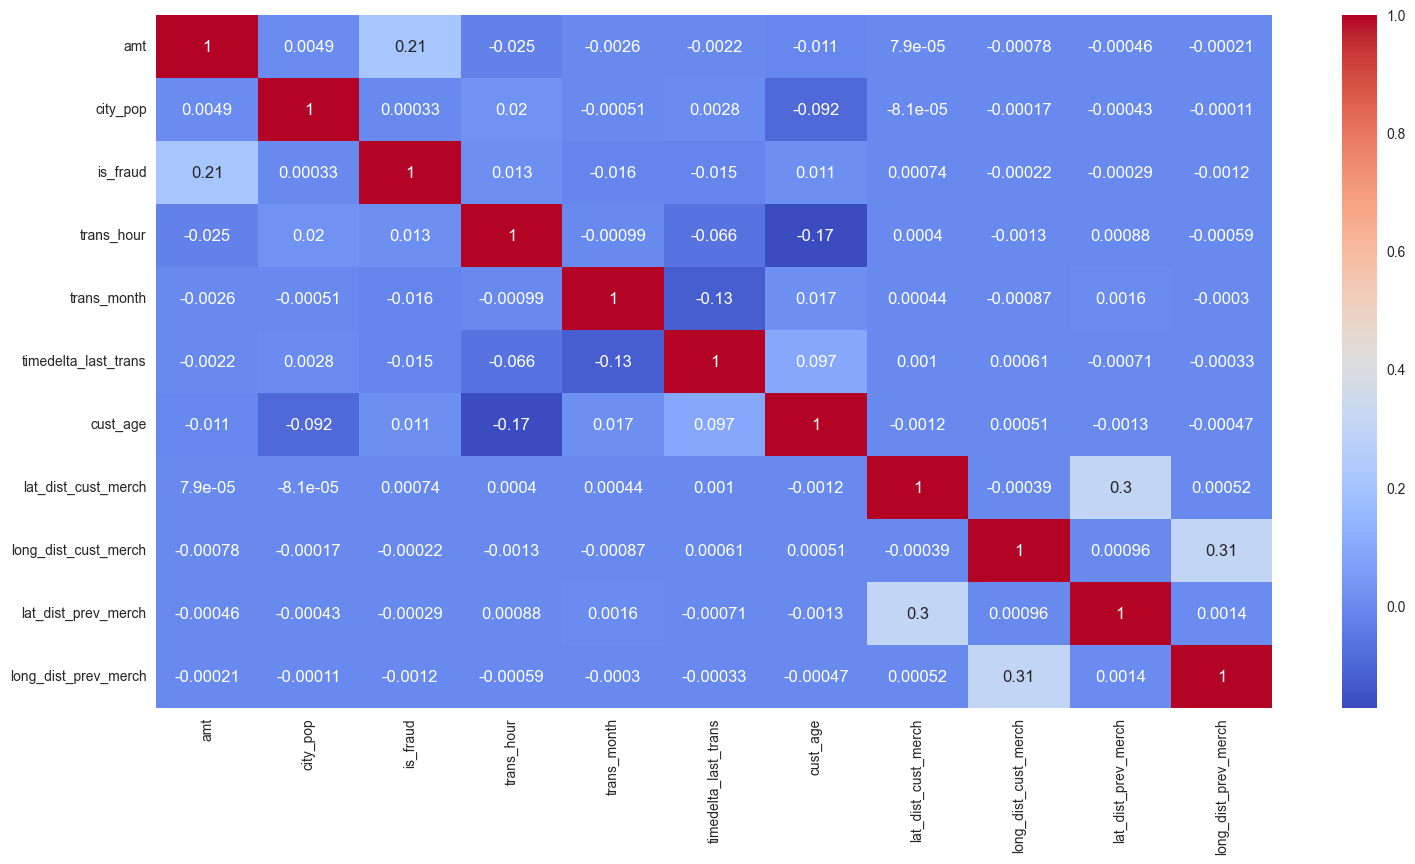

In [34]:
fig = plt.figure(figsize=(18,9))
sns.heatmap(card_data.corr(),cmap='coolwarm', annot=True)
plt.show()

There is no correlation detected

In [35]:
card_data['class'] = card_data['is_fraud'].map({1:'Fraud',0:'Non_Fraud'}) # mapping the classes 0 & 1 to genuine and fraud

normal = card_data[data['is_fraud'] == 0] # create the normal transaction dataset

fraud = card_data[data['is_fraud'] == 1] # create a fruad transaction dataset

In [36]:
def stats_by_class(variable):
  stat_grid = card_data.groupby('class')[variable].agg([np.min,np.max,np.mean,np.median])
  stat_grid = stat_grid.transpose().round(2)
  return stat_grid

In [37]:
def stats_by_var(variable):

  n = (normal[variable].value_counts(normalize = True)*100).round(2).rename('normal')
  f = (fraud[variable].value_counts(normalize = True)*100).round(2).rename('fraud')
  return pd.concat([n,f], axis = 1).transpose()

In [38]:
def plot_box (data, x, y, title , width = 10, height = 7):
  
  plt.figure(figsize = [width,height])
  sns.boxplot(data = data, x = x, y = y)
  plt.title(title);

In [39]:
def normalize_count_by_class(variable, width = 20, height = 7):

  plt.figure(figsize = [width,height])

  normalized_normal = (normal.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized value for normal transactions 

  normalized_fraud = (fraud.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized valued for the fraud transactions

  plot_table = pd.concat([normalized_normal.set_index(variable)[['class','value']],
                             normalized_fraud.set_index(variable)[['class','value']]], axis = 0).reset_index()
  
  sns.barplot(data = plot_table, x = variable, y = 'value', hue = 'class')
  plt.title('\nNormalized frequency of the varible < '+variable+' > on both classes\n')
  plt.xticks(rotation = 30);
  summary_table = pd.concat([normalized_normal.set_index(variable)['value'],
                             normalized_fraud.set_index(variable)['value']],
                            axis = 1).reset_index()

  summary_table.columns = [variable, 'normal', 'fraud']
  
  summary_table['diff in %'] = (summary_table['fraud'] - summary_table['normal'])

  summary_table.sort_values(by = 'diff in %', ascending = True, inplace = True)

  del normalized_normal,normalized_fraud,plot_table # delating the temperory varibale created in the function

  print('\nNormalized frequency of < '+variable+' > on both classes and the percentage diffrence\n')
  
  return summary_table

In [40]:
# choosing ggplot as the default plotting style

plt.style.use('ggplot')

,F,M
normal,54.80,45.20
fraud,50.76,49.24


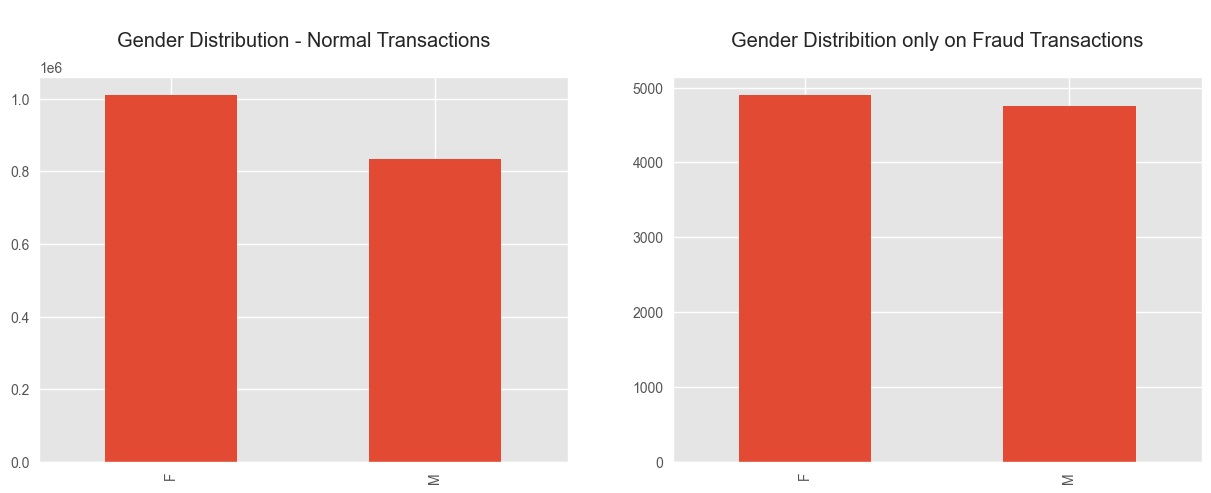

In [41]:
# plot gender count vs taget class

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
normal['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribution - Normal Transactions\n')

# plot gender count in fraud class

plt.subplot(1,2,2)
fraud['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribition only on Fraud Transactions\n');

stats_by_var('gender') # calling the stats by var function for the gender variable

class,Fraud,Non_Fraud
amin,14.00,13.00
amax,95.00,96.00
mean,48.33,45.75
median,47.00,44.00


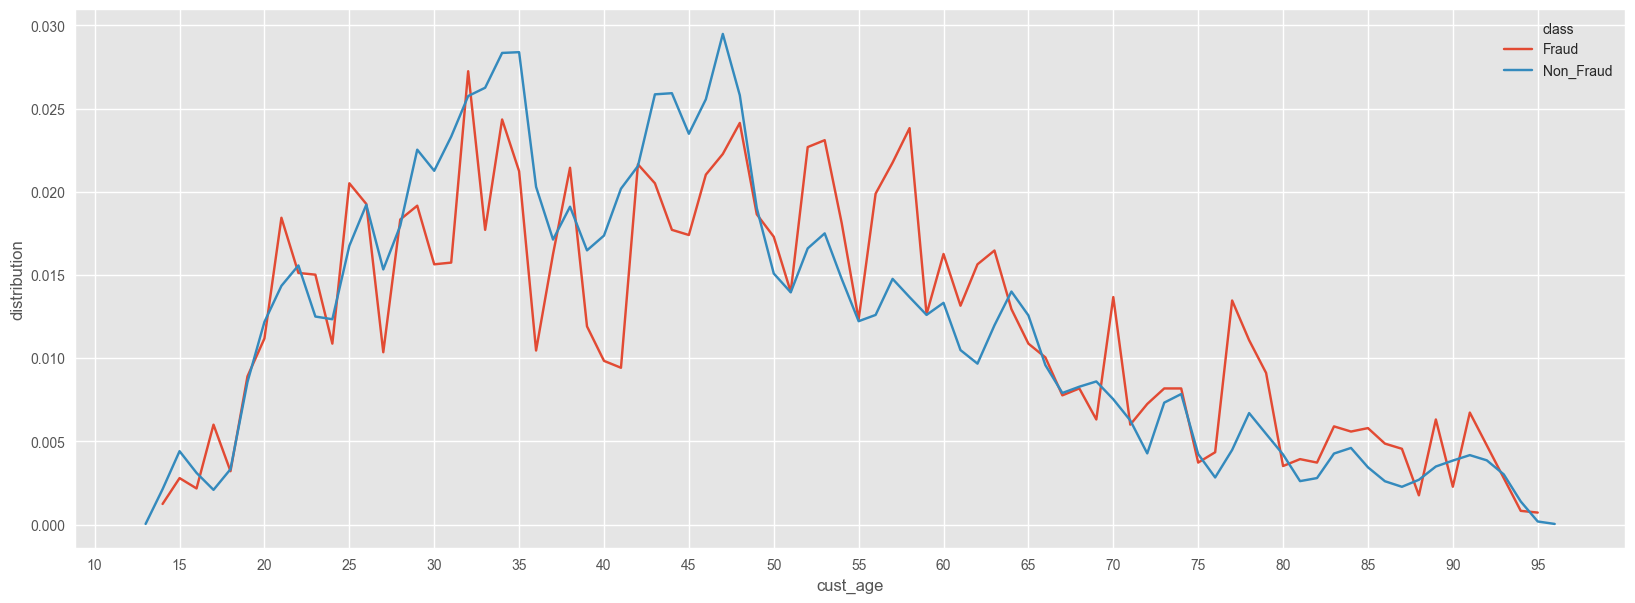

In [42]:
plt.figure(figsize = [20,7])

trans_hour_distribution = card_data.groupby('class')['cust_age'].value_counts(normalize = True).rename('distribution').reset_index() # count by customer age

sns.lineplot(data = trans_hour_distribution, x = 'cust_age', y = 'distribution', hue = 'class') # plotting the line plot with hue = class

plt.xticks(np.arange(10,100,5)); # modifying the xticks

stats_by_class('cust_age') # calling the stats by class function for cust_age varaible

In [43]:
# Function to show simple stats by class

def stats_by_class(variable):
  stat_grid = card_data.groupby('class')[variable].agg([np.min,np.max,np.mean,np.median])
  stat_grid = stat_grid.transpose().round(2)
  return stat_grid

class,Fraud,Non_Fraud
amin,1.06,1.00
amax,1376.04,28948.90
mean,530.66,67.65
median,390.00,47.24


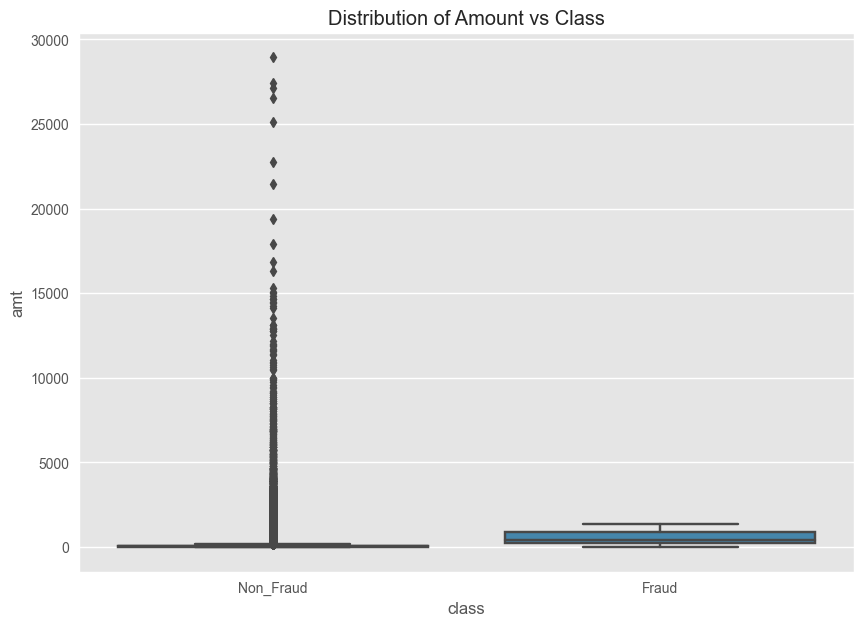

In [44]:
# plot amount of Transactions

plot_box(card_data,'class','amt','Distribution of Amount vs Class'); # calling the boxplot function

stats_by_class('amt') # calling the stats_by class function

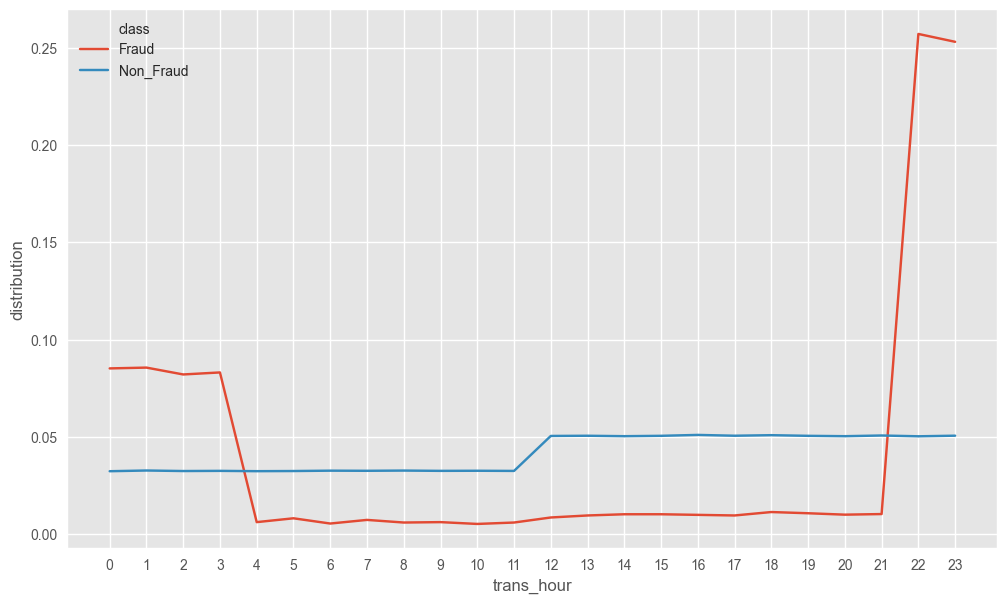

In [45]:
# Hour of Transactions

plt.figure(figsize = [12,7])

trans_hour_distribution = card_data.groupby('class')['trans_hour'].value_counts(normalize = True).rename('distribution').reset_index()

sns.lineplot(data = trans_hour_distribution, x = 'trans_hour', y = 'distribution', hue = 'class')
plt.xticks(np.arange(0,24,1))

plt.show()

Inferences :

Normal Transactions are distributed similarly over the hours with slight increase from 11th hour and maintatinig the same till 23rd hour
Fraud Transactions are majorly taking place between 21st hour - 04 hour
In other words, fraud transactions are happening in mid-nigh when the geniune card holders are sleeping and unable to get notified on the transaction messages

class,Fraud,Non_Fraud
amin,0.00,0.00
amax,14417.00,22357.00
mean,361.73,516.47
median,84.00,262.00


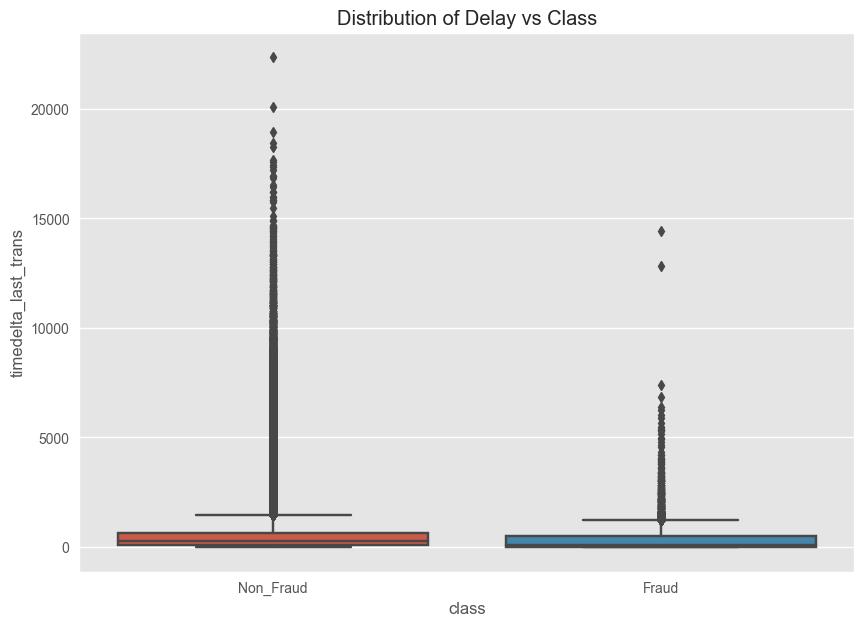

In [46]:
# Delay Between each Transactions --- Univariate Analysis
plot_box(card_data,'class','timedelta_last_trans','Distribution of Delay vs Class')
stats_by_class('timedelta_last_trans')

Inference :

The Successive fraud transactions are quicky happenin compared to the other transactions

In [47]:
def normalize_count_by_class(variable, width = 20, height = 7):

  plt.figure(figsize = [width,height])

  normalized_normal = (normal.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized value for normal transactions 

  normalized_fraud = (fraud.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized valued for the fraud transactions

  plot_table = pd.concat([normalized_normal.set_index(variable)[['class','value']],
                                    normalized_fraud.set_index(variable)[['class','value']]], axis = 0).reset_index()
  
  sns.barplot(data = plot_table, x = variable, y = 'value', hue = 'class')
  plt.title('\nNormalized frequency of the varible < '+variable+' > on both classes\n')
  plt.xticks(rotation = 30);
  summary_table = pd.concat([normalized_normal.set_index(variable)['value'],
                             normalized_fraud.set_index(variable)['value']],
                            axis = 1).reset_index()

  summary_table.columns = [variable, 'normal', 'fraud']
  
  summary_table['diff in %'] = (summary_table['fraud'] - summary_table['normal'])

  summary_table.sort_values(by = 'diff in %', ascending = True, inplace = True)

  del normalized_normal,normalized_fraud,plot_table # delating the temperory varibale created in the function
  print('\nNormalized frequency of < '+variable+' > on both classes and the percentage diffrence\n')
  
  return summary_table


Normalized frequency of < trans_dayofweek > on both classes and the percentage diffrence



,trans_dayofweek,normal,fraud,diff in %
0,Monday,19.966648,15.376645,-4.590003
1,Sunday,18.564010,16.474977,-2.089034
2,Tuesday,14.601819,13.117812,-1.484008
3,Saturday,14.203500,15.469899,1.266400
6,Wednesday,9.919343,11.656823,1.737480
5,Thursday,11.147729,13.646254,2.498525
4,Friday,11.596951,14.257590,2.660639


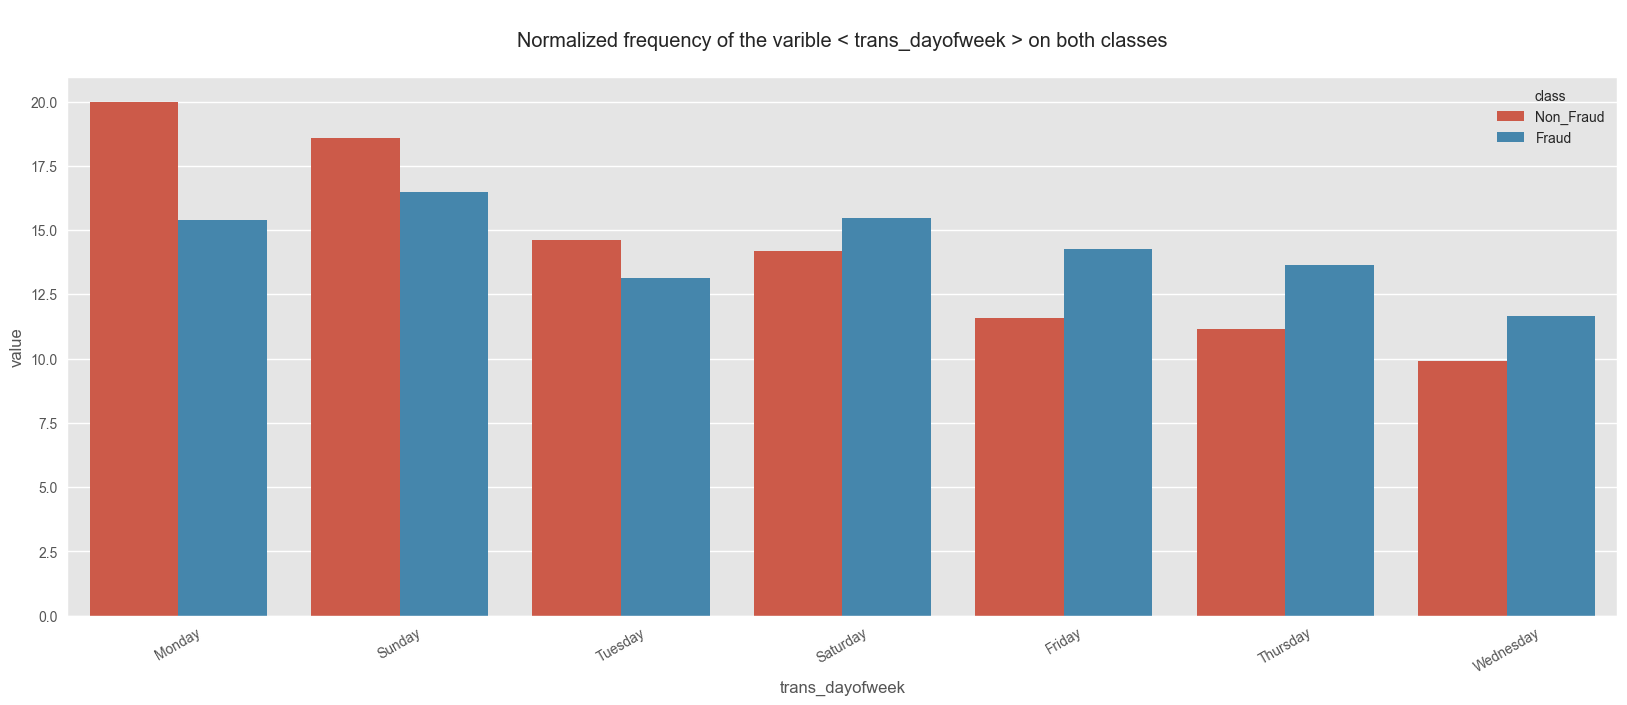

In [48]:
# The Weekday of the Transaction

normalize_count_by_class('trans_dayofweek')

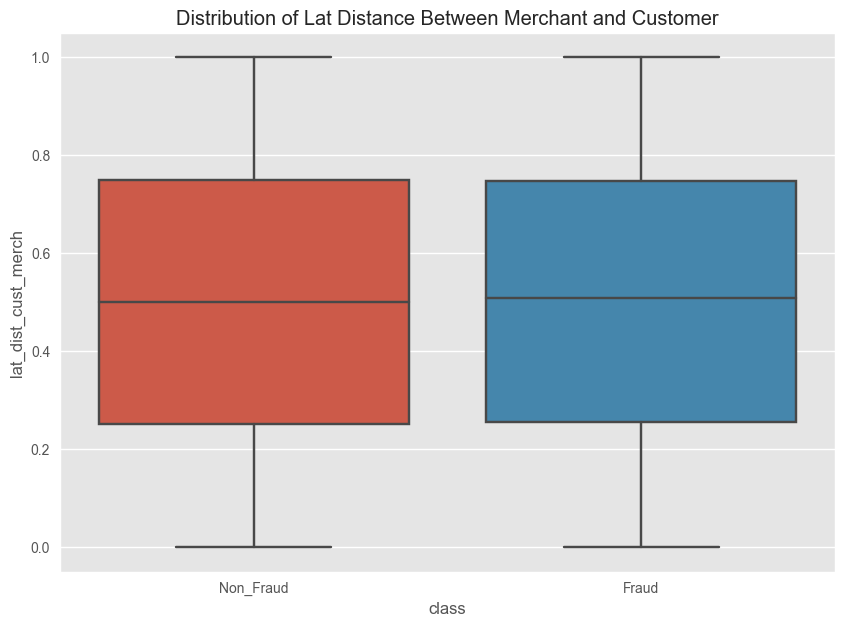

In [49]:
# Lat Distance between Customer & Merchant

plot_box(card_data,'class','lat_dist_cust_merch','Distribution of Lat Distance Between Merchant and Customer'); # calling the boxplot function

Inference :

There is no any observable difference in the overall distribution in the lat diatsnce between the customer and the merchant


Normalized frequency of < category > on both classes and the percentage diffrence



,category,normal,fraud,diff in %
1,home,9.507294,2.745829,-6.761465
4,kids_pets,8.759930,3.149933,-5.609998
7,food_dining,7.083136,2.124132,-4.959004
9,health_fitness,6.640535,1.916900,-4.723636
6,entertainment,7.262326,3.025593,-4.236733
8,personal_care,7.043576,3.004870,-4.038706
10,misc_pos,6.181383,3.336442,-2.844941
0,gas_transport,10.161862,7.999171,-2.162691
12,grocery_net,3.511233,1.813284,-1.697949
13,travel,3.136628,1.616413,-1.520216


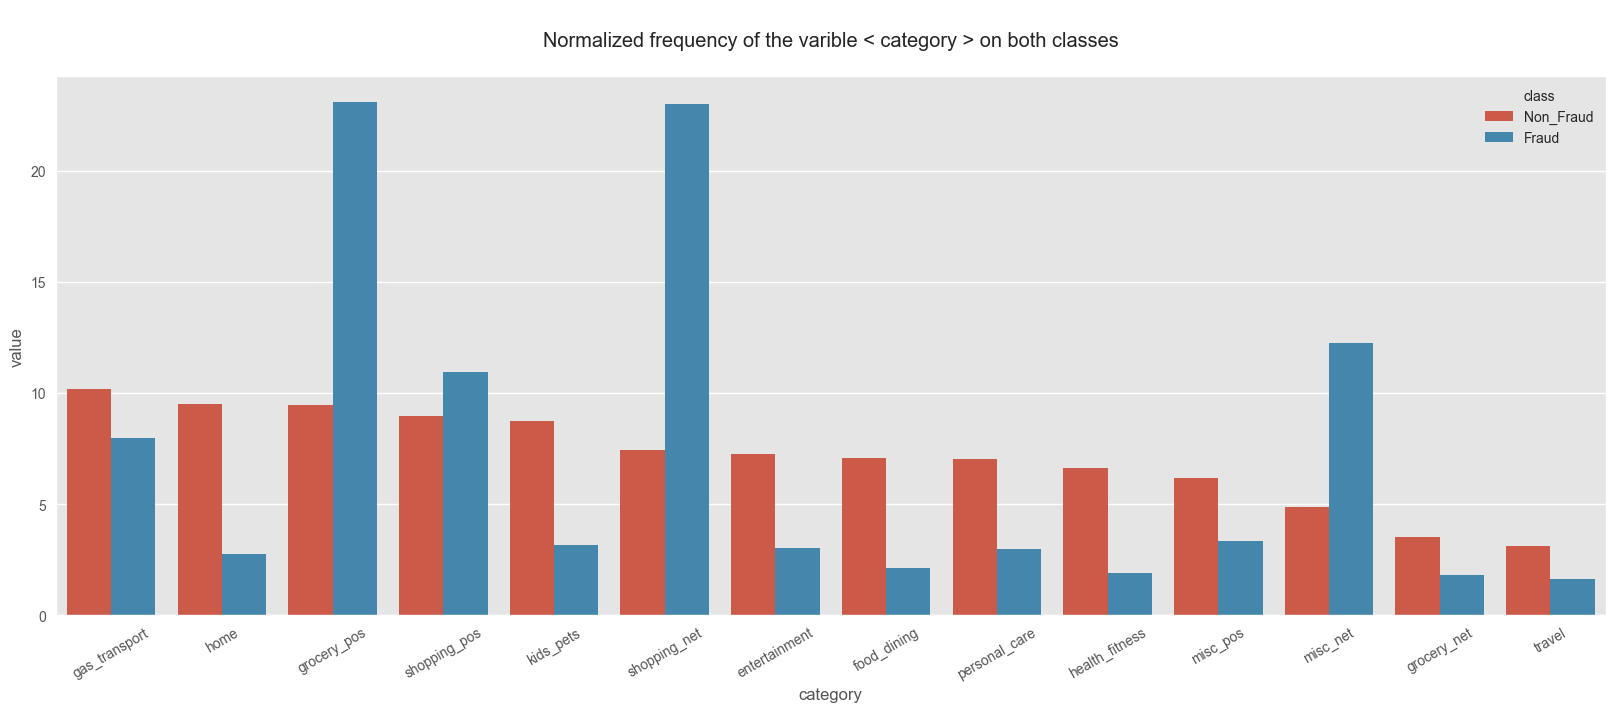

In [50]:
# Category of Item/Service Purchased

normalize_count_by_class('category')

In [51]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets, with a 70-30 split and shuffling
#train_data, test_data = train_test_split(card_data, test_size=0.3, shuffle=True)

In [52]:
train_data = data[data['split_label'] == 'train'] # train in split label

test_data = data[data['split_label'] == 'test'] # test in split label

In [53]:
train_data.drop('split_label', axis =1, inplace = True) # dropping the split label column

test_data.drop('split_label', axis =1, inplace = True) # dropping the split label column

In [54]:
X_train = train_data.drop('is_fraud', axis = 1) # features for training
y_train = train_data['is_fraud'] # label for training

X_test = test_data.drop('is_fraud', axis = 1) # features for testing
y_test = test_data['is_fraud'] # lables for testing


In [55]:
from sklearn.utils import resample
train_majority = train_data[train_data['is_fraud'] == 0] # create a subset of majority class

train_minority = train_data[train_data['is_fraud'] == 1] # create a subset of minority class

majority_count = len(train_majority) # lets count the number of records in the majority class

majority_count # dispaly the count

1289169

In [56]:
minority_resampled = resample(train_minority,n_samples = majority_count) # resampling the minority class using the boostaping method makes it equavalent in count with the majority class

In [57]:
train_symmetric = pd.concat([train_majority,minority_resampled], axis = 0) # concatinating the majority class subset and resampled minority class dataset to create a symmetric dataset

train_symmetric['is_fraud'].value_counts(normalize = True) # lets confirm the train symmetric dataset possess the equal distribution of classes.

0    0.5
1    0.5
Name: is_fraud, dtype: float64

In [58]:
train_symmetric_X = train_symmetric.drop('is_fraud', axis = 1) # features from symmetric train dataset

train_symmetric_y = train_symmetric['is_fraud'] # kabel from the symmetric train dataset

Outlier Detection

In [59]:
%pip install feature_engine # installing the feature_engine using pip install 

#clear_output() # clearing the install process logs

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [60]:
# lets select the numerical columns 

num_cols = X_train.select_dtypes(include = np.number).columns

num_cols

Index(['amt', 'city_pop', 'trans_hour', 'trans_month', 'timedelta_last_trans',
       'cust_age', 'lat_dist_cust_merch', 'long_dist_cust_merch',
       'lat_dist_prev_merch', 'long_dist_prev_merch'],
      dtype='object')

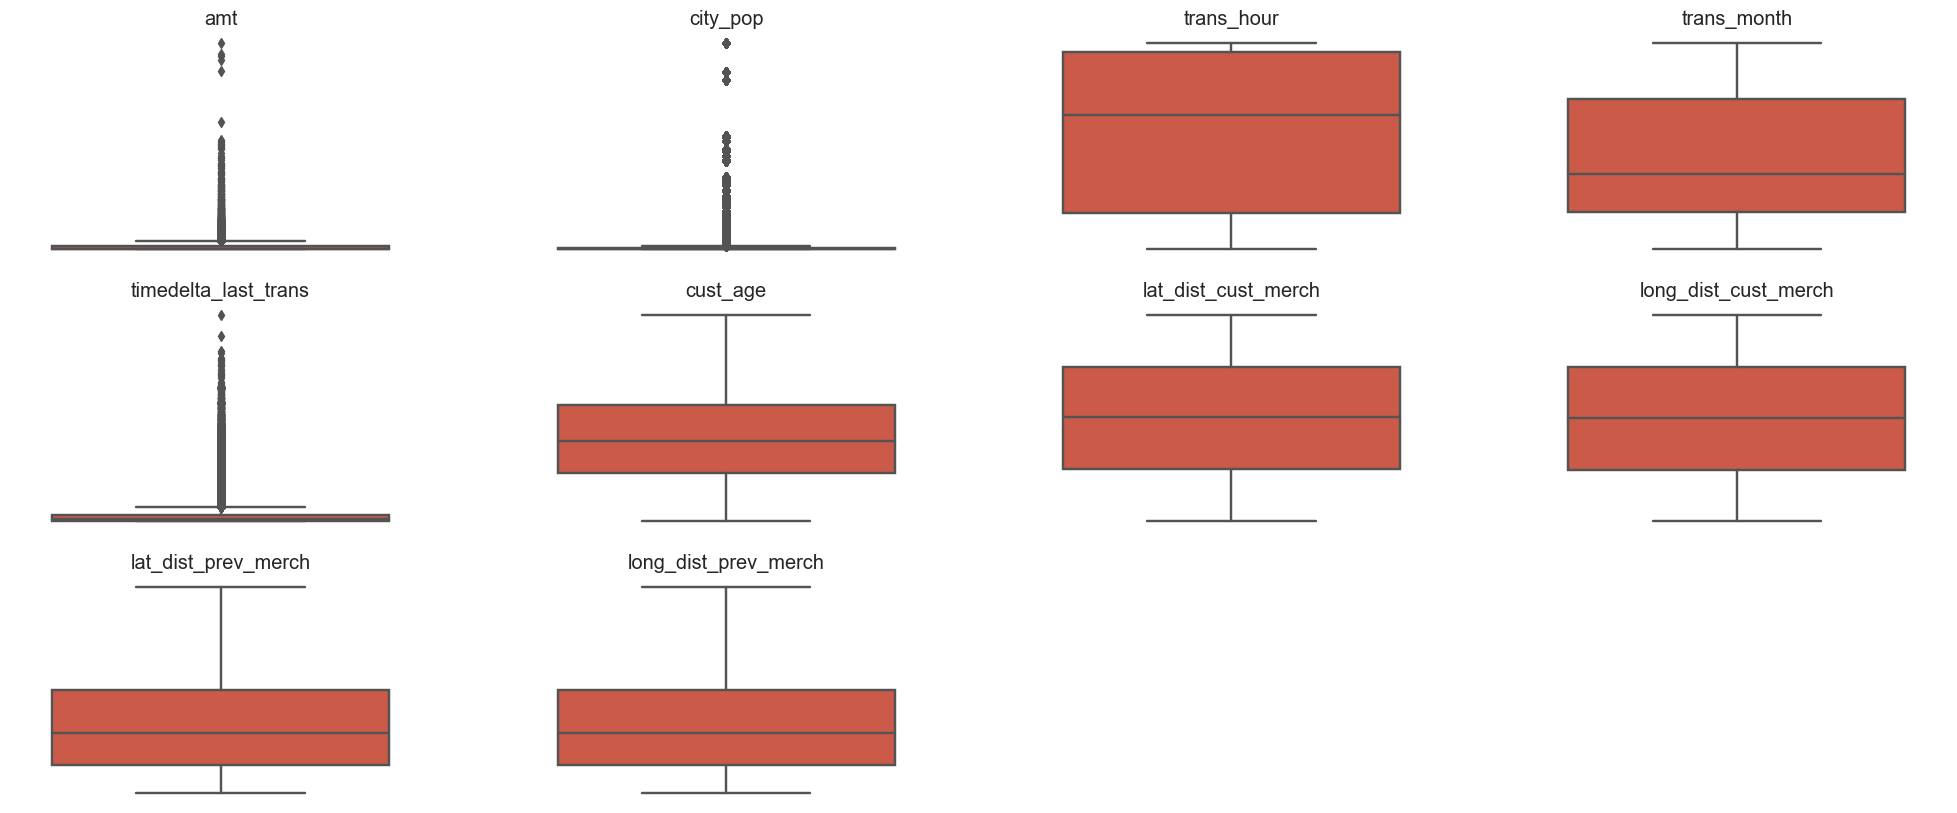

In [61]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
  plot_var = train_symmetric_X[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

In [62]:
%pip install feature_engine
import feature_engine

You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [63]:
from feature_engine.outliers import Winsorizer
variables = ['amt', 'city_pop', 'timedelta_last_trans'] # variables to be handled with the outlier

capper_iqr = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = variables) # choosing the IQR method with fold = 1.5 time of IQR

In [64]:
capper_iqr.fit(train_symmetric_X)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['amt', 'city_pop', 'timedelta_last_trans'])

In [65]:
print('upper capping value : ',capper_iqr.right_tail_caps_) # print the leraned parameters - upper cap

print('lower capping value : ',capper_iqr.left_tail_caps_) # pring the learned parameters - lower cap

upper capping value :  {'amt': 1168.25, 'city_pop': 50080.5, 'timedelta_last_trans': 1461.5}
lower capping value :  {'amt': -668.63, 'city_pop': -28859.5, 'timedelta_last_trans': -806.5}


In [66]:
train_symmetric_X = capper_iqr.transform(train_symmetric_X) # transforming symmetric X

X_train = capper_iqr.transform(X_train) # transforming the Real X with capper

X_test = capper_iqr.transform(X_test) # tranforming the test X

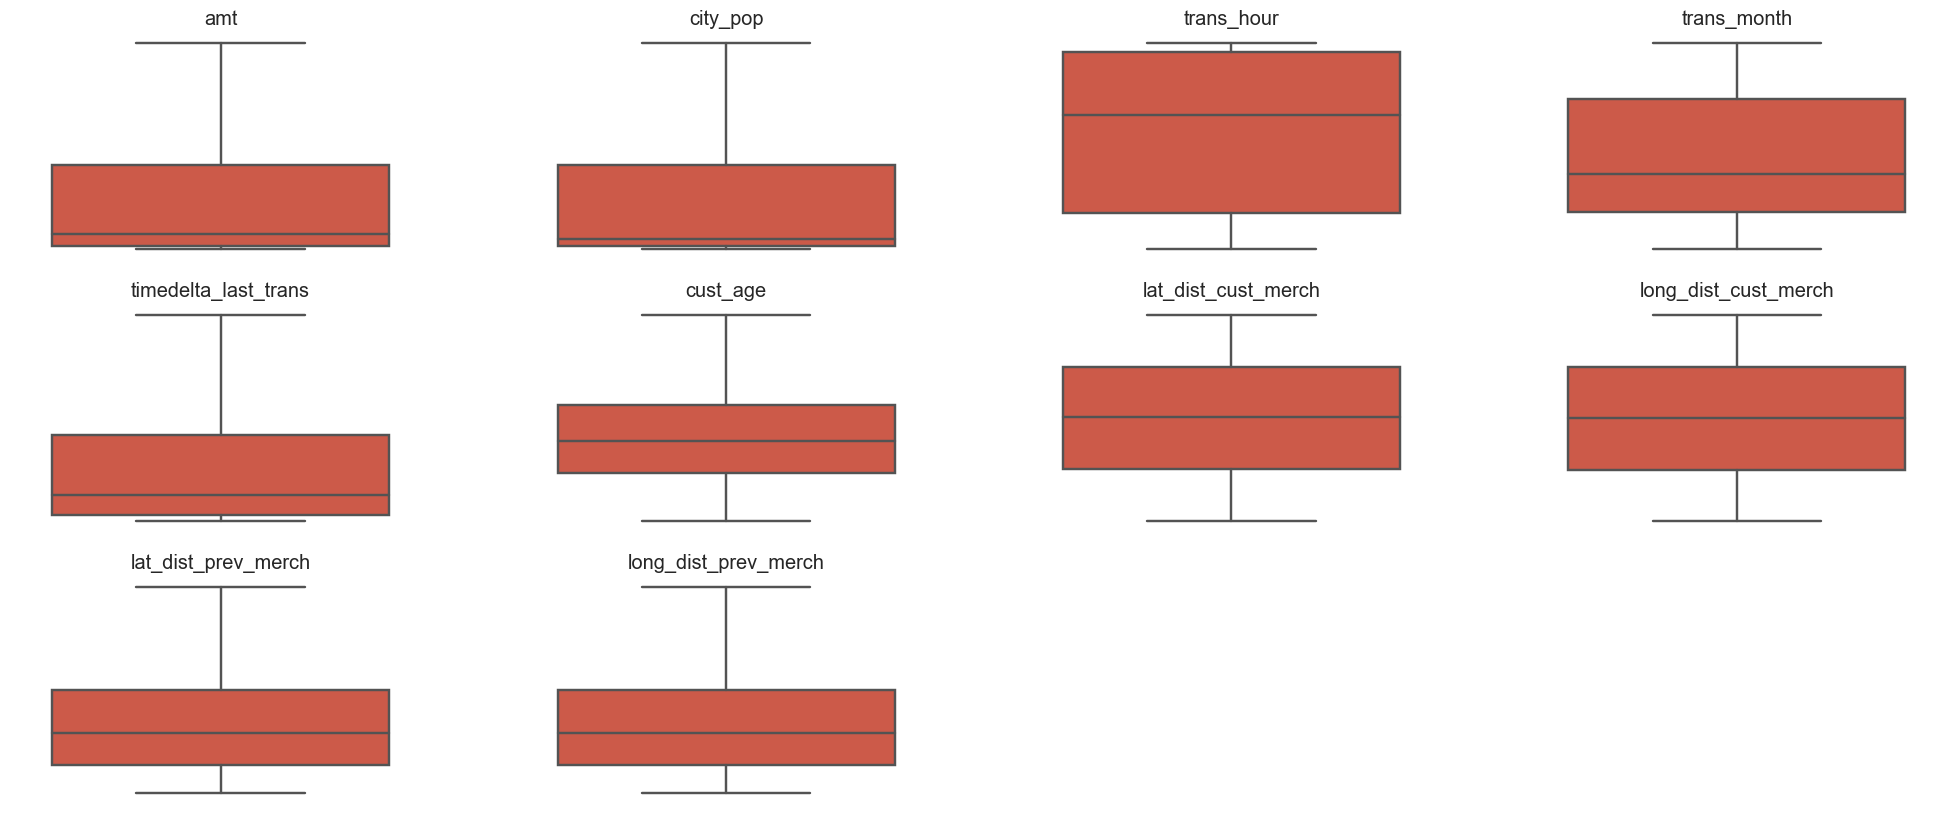

In [67]:
import matplotlib.pyplot
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
  plot_var = train_symmetric_X[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

In [68]:
cat_cols = X_train.select_dtypes(exclude = np.number).columns # choose the categorical variables

X_train[cat_cols].nunique().sort_values(ascending = False) # look at the cardinalitries of the categorical variables

state              51
category           14
trans_dayofweek     7
gender              2
dtype: int64

Categorical Encoding Encoding

Objective : To convert non-numeric categorical variables into numerical values to be used by model building phase, allowing them to use categorical data and improve performance, it prevent the curse of dimensionality

Steps

Check the cardinality of the variables
Choose the encoding type
Execute the encoding

Choosing Encoding Types

1.OneHotEncoding** : category , gender

2.Target Guided Mean Encoding :** state,trans_dayofweek

Execute the Encoding - OneHotEncoding

import the OneHotEncoder Class from the feature engine

In [69]:
from feature_engine.encoding import OneHotEncoder

In [70]:
variables = ['category','gender']

In [71]:
onehot_encod = OneHotEncoder(variables = variables, drop_last = True)

In [72]:
onehot_encod.fit(train_symmetric_X)

OneHotEncoder(drop_last=True, variables=['category', 'gender'])

In [73]:
train_symmetric_X = onehot_encod.transform(train_symmetric_X) # transform the symmetric X

X_train = onehot_encod.transform(X_train) # transform the real X

X_test = onehot_encod.transform(X_test) # transform test X

Execute the Encoding - Target Guided Mean Encoding

Importing the MeanEncoder Class from feature_engine

In [74]:
from feature_engine.encoding import MeanEncoder

In [75]:
variables = ['state','trans_dayofweek']

Creating the mean encoder instance

In [76]:
mean_encod = MeanEncoder(variables = variables)

In [77]:
mean_encod.fit(train_symmetric_X,train_symmetric_y) #Fitting the object on the symmetric X train

MeanEncoder(variables=['state', 'trans_dayofweek'])

In [78]:
mean_encod.encoder_dict_ #Let look at the encoding dict

{'state': {'AK': 0.7462250365319045,
  'AL': 0.47342864153526276,
  'AR': 0.4723982825598037,
  'AZ': 0.37299918214744715,
  'CA': 0.5007484229658933,
  'CO': 0.5870230381569475,
  'CT': 0.2703626352762483,
  'DC': 0.49436936936936937,
  'DE': 1.0,
  'FL': 0.5326968868506923,
  'GA': 0.4927385892116183,
  'HI': 0.3057671381936888,
  'IA': 0.47747800358171766,
  'ID': 0.2610495393243424,
  'IL': 0.4981093319639606,
  'IN': 0.4682970312378885,
  'KS': 0.5382313695362096,
  'KY': 0.4857827650070814,
  'LA': 0.42650695093136987,
  'MA': 0.48891196013289034,
  'MD': 0.50955977923032,
  'ME': 0.5573624355060914,
  'MI': 0.47020203768447044,
  'MN': 0.5286981496163109,
  'MO': 0.4610665275094143,
  'MS': 0.4864752899892777,
  'MT': 0.323756778585439,
  'NC': 0.4593774682271846,
  'ND': 0.397611549629872,
  'NE': 0.5602405221089682,
  'NH': 0.5523664288437449,
  'NJ': 0.4542273142678822,
  'NM': 0.4636814612832222,
  'NV': 0.5962529954251689,
  'NY': 0.5343487023449298,
  'OH': 0.5431656456290

In [79]:
#Transforming the X_symmetric, Real_X and X_test
train_symmetric_X = mean_encod.transform(train_symmetric_X) # transforming the symmetric X

X_train = mean_encod.transform(X_train) # Transforming the Real X Train

X_test = mean_encod.transform(X_test) # Transforming the X test

In [80]:
X_train.dtypes

amt                        float64
state                      float64
city_pop                   float64
trans_hour                   int64
trans_month                  int64
trans_dayofweek            float64
timedelta_last_trans       float64
cust_age                   float64
lat_dist_cust_merch        float64
long_dist_cust_merch       float64
lat_dist_prev_merch        float64
long_dist_prev_merch       float64
category_misc_net            int32
category_gas_transport       int32
category_kids_pets           int32
category_home                int32
category_shopping_net        int32
category_food_dining         int32
category_personal_care       int32
category_grocery_pos         int32
category_entertainment       int32
category_shopping_pos        int32
category_misc_pos            int32
category_travel              int32
category_health_fitness      int32
gender_F                     int32
dtype: object

In [81]:
X_train.skew() # Look at the skewness of the variables

amt                        5.683891
state                     -1.007758
city_pop                   1.191580
trans_hour                -0.282825
trans_month                0.298516
trans_dayofweek           -0.107875
timedelta_last_trans       1.100931
cust_age                   0.610874
lat_dist_cust_merch       -0.001202
long_dist_cust_merch      -0.001450
lat_dist_prev_merch        0.565637
long_dist_prev_merch       0.565088
category_misc_net          4.188097
category_gas_transport     2.638516
category_kids_pets         2.926938
category_home              2.763540
category_shopping_net      3.220984
category_food_dining       3.354589
category_personal_care     3.370824
category_grocery_pos       2.755556
category_entertainment     3.297053
category_shopping_pos      2.865788
category_misc_pos          3.652961
category_travel            5.389197
category_health_fitness    3.488526
gender_F                  -0.190655
dtype: float64

In [82]:
skew = X_train.skew()
feature_high_skew = list(skew[(skew > 2) | (skew < -2)].index)
feature_high_skew

['amt',
 'category_misc_net',
 'category_gas_transport',
 'category_kids_pets',
 'category_home',
 'category_shopping_net',
 'category_food_dining',
 'category_personal_care',
 'category_grocery_pos',
 'category_entertainment',
 'category_shopping_pos',
 'category_misc_pos',
 'category_travel',
 'category_health_fitness']

In [83]:
X_train.min()

amt                         1.000000
state                       0.261050
city_pop                   23.000000
trans_hour                  0.000000
trans_month                 1.000000
trans_dayofweek             0.445622
timedelta_last_trans        0.000000
cust_age                   13.000000
lat_dist_cust_merch         0.000000
long_dist_cust_merch        0.000000
lat_dist_prev_merch         0.000000
long_dist_prev_merch        0.000000
category_misc_net           0.000000
category_gas_transport      0.000000
category_kids_pets          0.000000
category_home               0.000000
category_shopping_net       0.000000
category_food_dining        0.000000
category_personal_care      0.000000
category_grocery_pos        0.000000
category_entertainment      0.000000
category_shopping_pos       0.000000
category_misc_pos           0.000000
category_travel             0.000000
category_health_fitness     0.000000
gender_F                    0.000000
dtype: float64

Since we have zero or negative values in the dataset, We can try the following,

Exponential Transformation
Yoejohnson Transformation
Import the YeoJohnsonTransformer from feature Engine

In [84]:
from feature_engine.transformation import YeoJohnsonTransformer

In [85]:
yeojohnson_transformer = YeoJohnsonTransformer(variables = feature_high_skew)

In [86]:
# Fitting the symmetric X train

yeojohnson_transformer.fit(train_symmetric_X)

YeoJohnsonTransformer(variables=['amt', 'category_misc_net',
                                 'category_gas_transport', 'category_kids_pets',
                                 'category_home', 'category_shopping_net',
                                 'category_food_dining',
                                 'category_personal_care',
                                 'category_grocery_pos',
                                 'category_entertainment',
                                 'category_shopping_pos', 'category_misc_pos',
                                 'category_travel', 'category_health_fitness'])

In [87]:
# Transform the dataset to the transformation object

train_symmetric_X = yeojohnson_transformer.transform(train_symmetric_X) # transforming the symmetric X

X_train = yeojohnson_transformer.transform(X_train) # Transforming the Real X

X_test = yeojohnson_transformer.transform(X_test) # Transforming the X test

In [88]:
# Using min-max scalling to scale the dataset since the dataset has no outliers
from sklearn.preprocessing import MinMaxScaler 

In [89]:
scaler = MinMaxScaler() # creating the scaler object

In [90]:
train_symmetric_X.dtypes

amt                        float64
state                      float64
city_pop                   float64
trans_hour                   int64
trans_month                  int64
trans_dayofweek            float64
timedelta_last_trans       float64
cust_age                   float64
lat_dist_cust_merch        float64
long_dist_cust_merch       float64
lat_dist_prev_merch        float64
long_dist_prev_merch       float64
category_misc_net          float64
category_gas_transport     float64
category_kids_pets         float64
category_home              float64
category_shopping_net      float64
category_food_dining       float64
category_personal_care     float64
category_grocery_pos       float64
category_entertainment     float64
category_shopping_pos      float64
category_misc_pos          float64
category_travel            float64
category_health_fitness    float64
gender_F                     int32
dtype: object

In [91]:
scaler.fit(train_symmetric_X) # fit on the symmetric X to learn the parameter for the scaler

MinMaxScaler()

In [92]:
# Lets look at the min-max parameters for each variables
scaler.data_max_

array([9.22373366e+00, 1.00000000e+00, 5.00805000e+04, 2.30000000e+01,
       1.20000000e+01, 5.50455660e-01, 1.46150000e+03, 9.50000000e+01,
       9.99999000e-01, 9.99997000e-01, 1.99967700e+00, 1.99622300e+00,
       5.90107835e-02, 6.38906198e-02, 4.14073270e-02, 4.22149201e-02,
       1.05746969e-01, 3.14222272e-02, 3.45175924e-02, 1.14586662e-01,
       3.59563980e-02, 6.99223013e-02, 3.29629207e-02, 1.62134310e-02,
       2.92046090e-02, 1.00000000e+00])

In [93]:
scaler.data_min_

array([ 0.71084429,  0.26104954, 23.        ,  0.        ,  1.        ,
        0.44562237,  0.        , 13.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ])

In [94]:
train_symmetric_X = pd.DataFrame(data = scaler.transform(train_symmetric_X), columns = train_symmetric_X.columns) # transform the X_symmetric

X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns) # transform the Real X

X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns) # transform the X test

In [95]:
# Lets look at the Train dataframe and after the transformation

print('number of arrived columns : ', len(X_train.columns))

X_train.agg(func =[np.min,np.max,np.mean, np.std], axis = 0).transpose().round(2)

number of arrived columns :  26


,amin,amax,mean,std
amt,0.0,1.0,0.40,0.19
state,0.0,1.0,0.32,0.07
city_pop,0.0,1.0,0.27,0.39
trans_hour,0.0,1.0,0.56,0.30
trans_month,0.0,1.0,0.47,0.31
trans_dayofweek,0.0,1.0,0.49,0.38
timedelta_last_trans,0.0,1.0,0.31,0.31
cust_age,0.0,1.0,0.40,0.21
lat_dist_cust_merch,0.0,1.0,0.50,0.29
long_dist_cust_merch,0.0,1.0,0.50,0.29


In [96]:
#Lets check the original train set status

print(X_train.shape, y_train.shape,'\n')
print(y_train.value_counts(normalize = True)*100)

(1296675, 26) (1296675,) 

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64


In [97]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

In [98]:
# Create a control legth for each Class

# total legth of the resulting sample = control_length x 2

ini_records = sum(y_train == 0) # get to the number record representing the majority class

control_len = ini_records//3 # arriving the control length

control_len # display the control lengh ( expected numeber of each class in the resulting dataset )

429723

In [99]:
# Make pipeline for making the sample for Training

resample_pipeline_learning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # oversampling of the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

In [100]:
#Create the training sample using the above defined pipeline

X_resampled, y_resampled = resample_pipeline_learning.fit_resample(X_train,y_train)

[Pipeline] ............. (step 1 of 2) Processing smote, total=   1.7s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   1.5s


In [101]:
# Lets confirm the class distribution

print(X_resampled.shape, y_resampled.shape,'\n')
print(y_resampled.value_counts(normalize = True)*100)

(859446, 26) (859446,) 

0    50.0
1    50.0
Name: is_fraud, dtype: float64


In [102]:
# Lets create sample for hyperparameter tuning purpose

control_len = 100000 # limiting the length of each class into much reduced size

resample_pipeline_hp_tuning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # over sampling the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

X_hp_tuning, y_hp_tuning = resample_pipeline_hp_tuning.fit_resample(X_train,y_train) # resampling with the pipeline

[Pipeline] ............. (step 1 of 2) Processing smote, total=   1.0s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   0.7s


In [103]:
# Lets confirm the distribution of the class in the hyperparamter tuning class

print(X_hp_tuning.shape, y_hp_tuning.shape,'\n')
print(y_hp_tuning.value_counts(normalize = True)*100)

(200000, 26) (200000,) 

0    50.0
1    50.0
Name: is_fraud, dtype: float64


In [104]:
#Delete the Redundant Objects to Freeup the Memory
variable_remove = ['train_data','test_data','drop_cols2','stats_by_class','stats_by_var','normalize_count_by_class','trans_hour_distribution','majority_count','resample',
                   'train_majority','train_minority','minority_resampled','train_symmetric','train_symmetric_X','train_symmetric_y','num_cols','col_name','Winsorizer',
                   'OneHotEncoder','MeanEncoder','skew','feature_high_skew','YeoJohnsonTransformer','MinMaxScaler','SMOTE','RandomUnderSampler','make_pipeline','ini_records']

In [105]:
# deleting the redundant variables from the memory

for rem in variable_remove:
  try:
    del vars()[rem]
  except:
    pass

Buildinhg Models:
1- Random Forest
2- Decsison trees
3- 

In [106]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\nuhaa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [107]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [108]:
# Model one - Desicion Tree
model_one = DecisionTreeClassifier(max_depth = 30, min_samples_split= 30, random_state=42,class_weight = {0:20,1:1}) # creating the model object

model_one_spec = 'Decision Tree | Normal H-Params'

model_one.fit(X_resampled,y_resampled) # fitting the model with train_sample

DecisionTreeClassifier(class_weight={0: 20, 1: 1}, max_depth=30,
                       min_samples_split=30, random_state=42)

In [109]:
# Saves dataframes in external hard drive
#X_test.to_csv('X_test.csv', index=False)
#y_test.to_csv('y_test.csv', index=False)
#X_resampled.to_csv('X_resampled.csv', index=False)
#y_resampled.to_csv('y_resampled.csv', index=False)


In [110]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split


# Make predictions on the testing data
y_pred = model_one.predict(X_test)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)


Accuracy: 0.9951648225092178
Precision: 0.43463579353593823
Recall: 0.84009324009324
F1 score: 0.5728818947703067
Confusion matrix:
 [[551230   2344]
 [   343   1802]]


In [111]:
from sklearn.metrics import average_precision_score

# Obtain predicted probabilities for the positive class
y_scores = model_one.predict_proba(X_test)[:, 1]  # model_one with the Decision Tree model

# Calculate AP score
ap_score = average_precision_score(y_test, y_scores)

# Print the AP score
print("Average Precision (AP) Score:", ap_score)

Average Precision (AP) Score: 0.3969220113863046


Confusion matrix:
[[551230   2344]
 [   343   1802]]


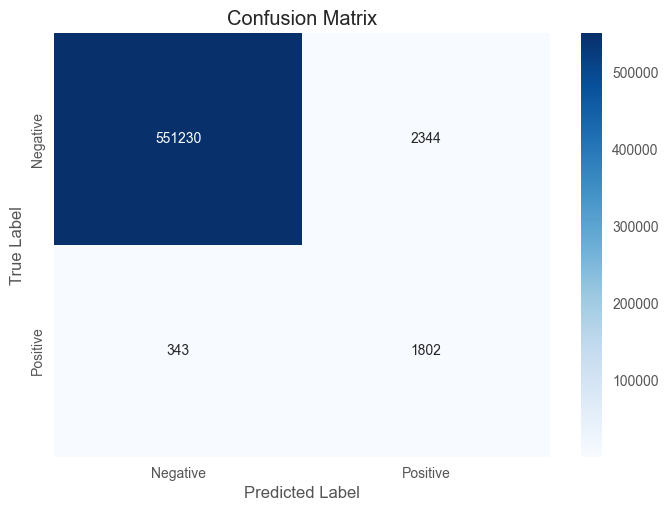

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# Print the confusion matrix
print("Confusion matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
labels = ["Negative", "Positive"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for positive class
y_scores = model_one.predict_proba(X_test)[:, 1] 


In [114]:
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_scores)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

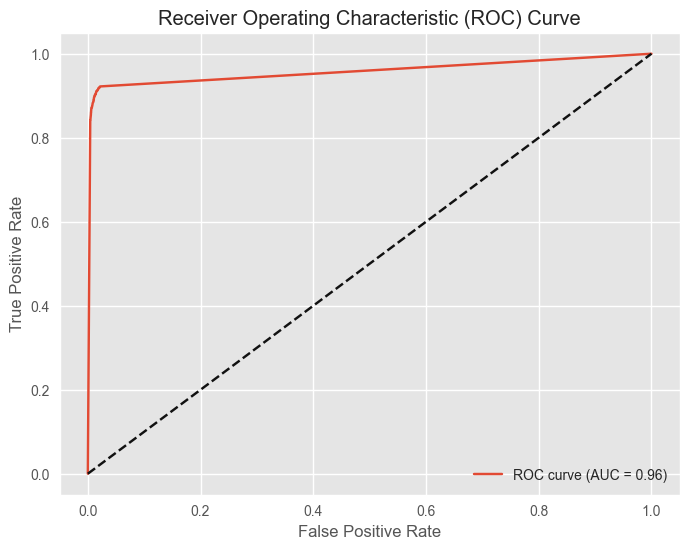

In [115]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


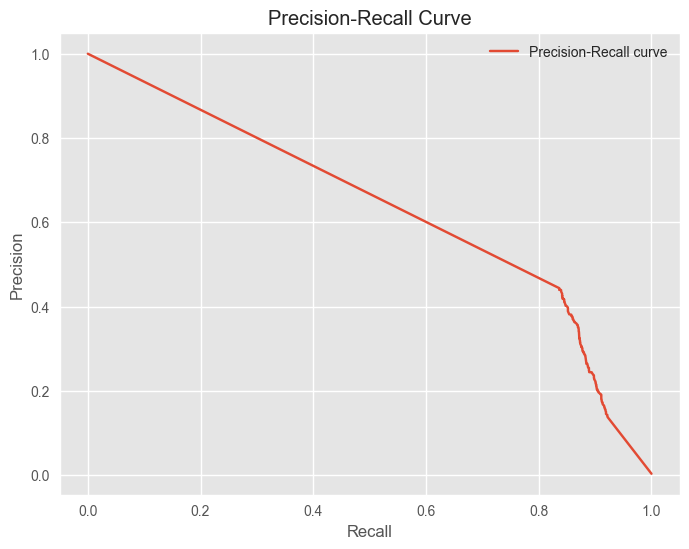

In [116]:

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [117]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model to your data
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [118]:
# Make predictions on the testing data for Random Forest model
y_pred = model.predict(X_test)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)


Accuracy: 0.9978622289322482
Precision: 0.6828429499426825
Recall: 0.8331002331002331
F1 score: 0.75052498950021
Confusion matrix:
 [[552744    830]
 [   358   1787]]


In [119]:
from sklearn.metrics import average_precision_score

# Obtain predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]  # model_two with the Random Forest model

# Calculate AP score
ap_score = average_precision_score(y_test, y_scores)

# Print the AP score
print("Average Precision (AP) Score:", ap_score)

Average Precision (AP) Score: 0.8499812101808903


In [120]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_scores)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)


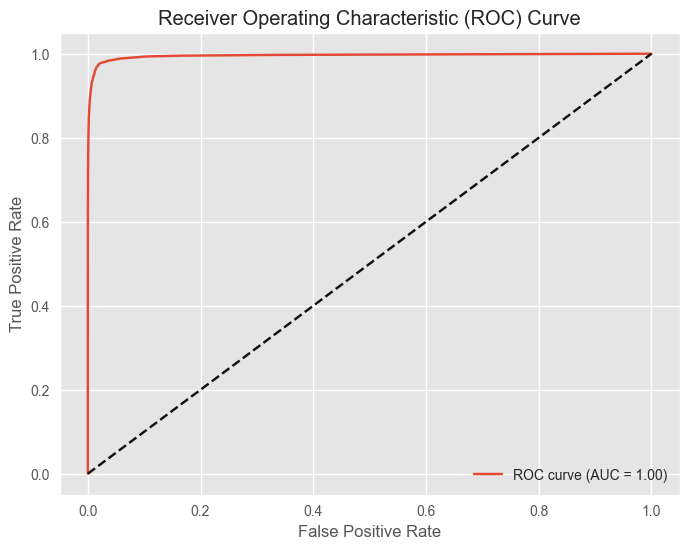

In [121]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


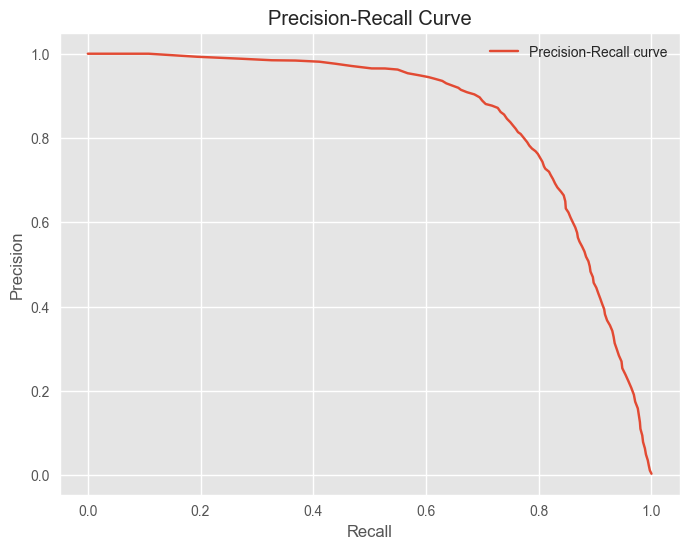

In [122]:

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [123]:
# Obtain feature importance scores
feature_importances = model.feature_importances_

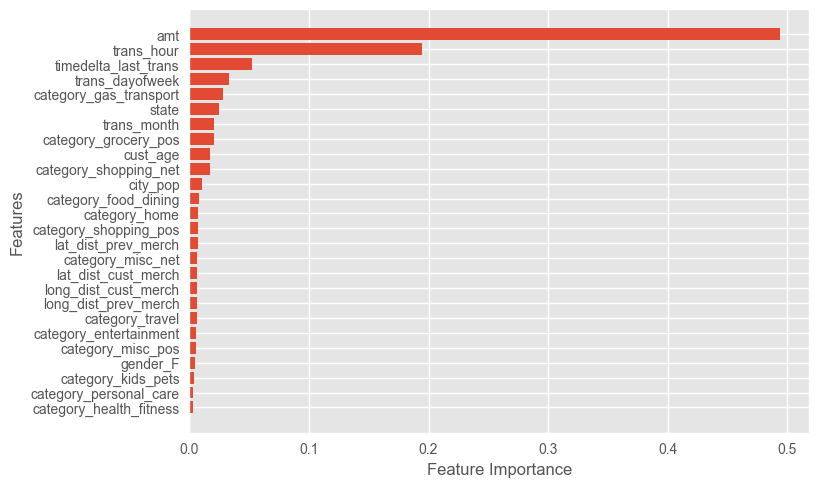

In [124]:
# Visualize feature importances
feature_names = np.array(X_resampled.columns)
sorted_indices = np.argsort(feature_importances)
plt.barh(range(len(feature_names)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_names)), feature_names[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

Confusion matrix:
[[552744    830]
 [   358   1787]]


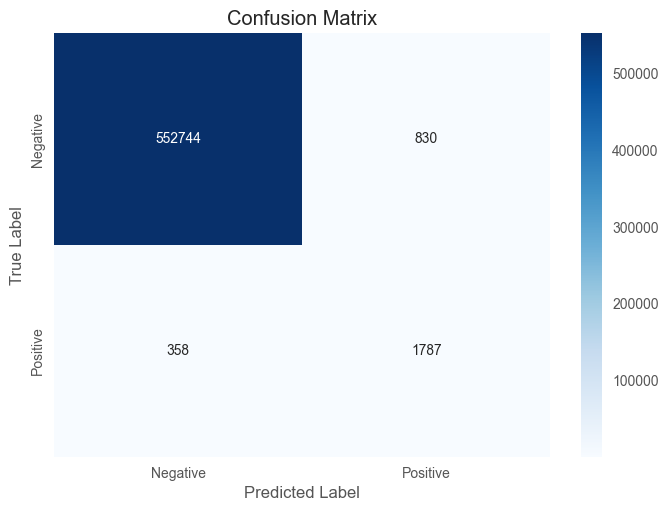

In [125]:
# Print the confusion matrix for Random Forest model
print("Confusion matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
labels = ["Negative", "Positive"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [126]:
# Model three - KNN
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier with hyperparameters
model_three = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')

model_three_spec = 'KNN | Normal H-Params'

# Train the KNN classifier on the resampled data
model_three.fit(X_resampled, y_resampled)


KNeighborsClassifier(weights='distance')

In [127]:
# Make predictions on the testing data for KNN model
y_pred = model_three.predict(X_test)

# Calculate various evaluation metrics for KNN model
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.9682591381615528
Precision: 0.07983512311530534
Recall: 0.6862470862470863
F1 score: 0.1430306563669047
Confusion matrix:
 [[536608  16966]
 [   673   1472]]


In [128]:
# Obtain predicted probabilities for the positive class
y_scores = model_three.predict_proba(X_test)[:, 1]  # model_three with the KNN model

# Calculate AP score
ap_score = average_precision_score(y_test, y_scores)

# Print the AP score
print("Average Precision (AP) Score:", ap_score)

Average Precision (AP) Score: 0.12015084232202951


Confusion matrix:
[[536608  16966]
 [   673   1472]]


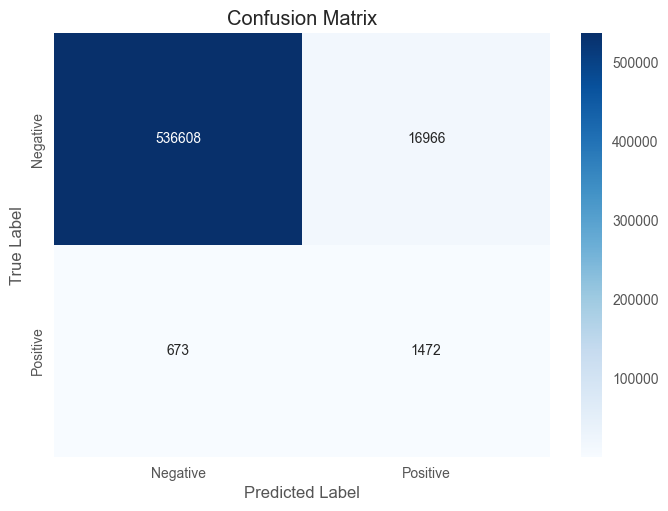

In [129]:
# Print the confusion matrix
print("Confusion matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
labels = ["Negative", "Positive"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for positive class
y_scores = model_three.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_scores)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)


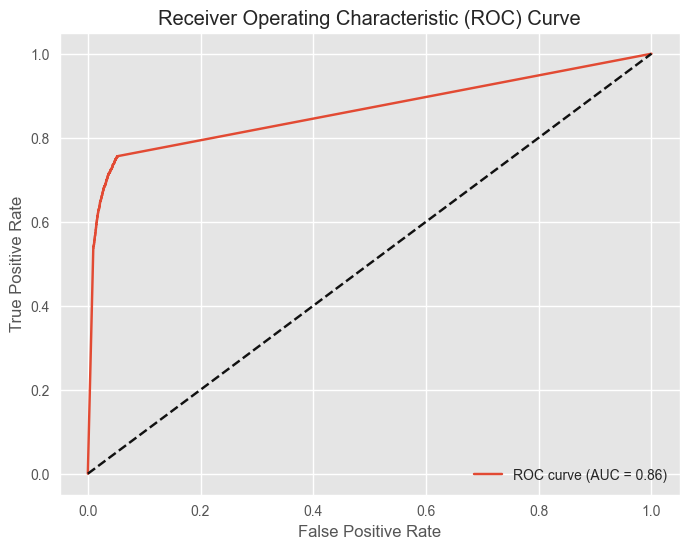

In [131]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


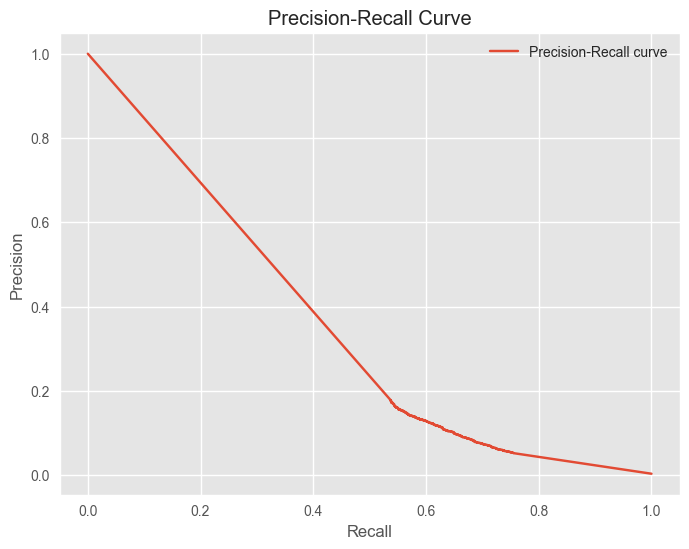

In [132]:

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [133]:
import xgboost as xgb

# Create an instance of the xgboost classifier
model_four = xgb.XGBClassifier()

# Fit the model to your data
model_four.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [134]:
# Make predictions on the testing data for XGBoost model
y_pred = model_four.predict(X_test)

# Calculate various evaluation metrics for KNN model
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.9984110674639521
Precision: 0.7703513281919452
Recall: 0.8382284382284382
F1 score: 0.8028577807546328
Confusion matrix:
 [[553038    536]
 [   347   1798]]


Confusion matrix:
[[553038    536]
 [   347   1798]]


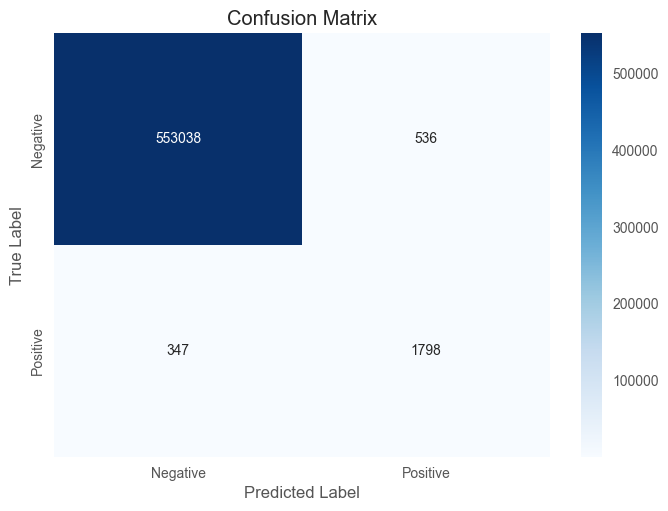

In [135]:
# Print the confusion matrix
print("Confusion matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
labels = ["Negative", "Positive"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [136]:
from sklearn.metrics import average_precision_score

# Obtain predicted probabilities for the positive class
y_scores = model_four.predict_proba(X_test)[:, 1]  # model_four XGBoost model

# Calculate AP score
ap_score = average_precision_score(y_test, y_scores)

# Print the AP score
print("Average Precision (AP) Score:", ap_score)


Average Precision (AP) Score: 0.8923981802065583


In [137]:
# Obtain feature importance scores
feature_importances = model_four.feature_importances_

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for positive class
y_scores = model_four.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_scores)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

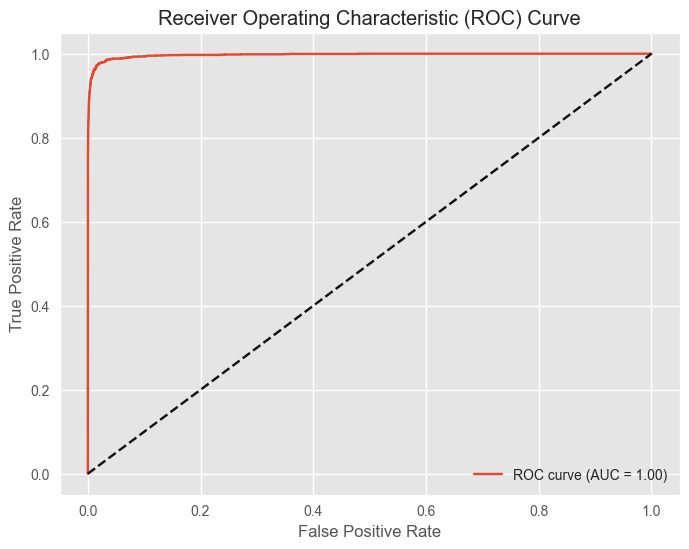

In [139]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Plotting the diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['ROC curve (AUC = %0.2f)' % auc_roc])
plt.show()

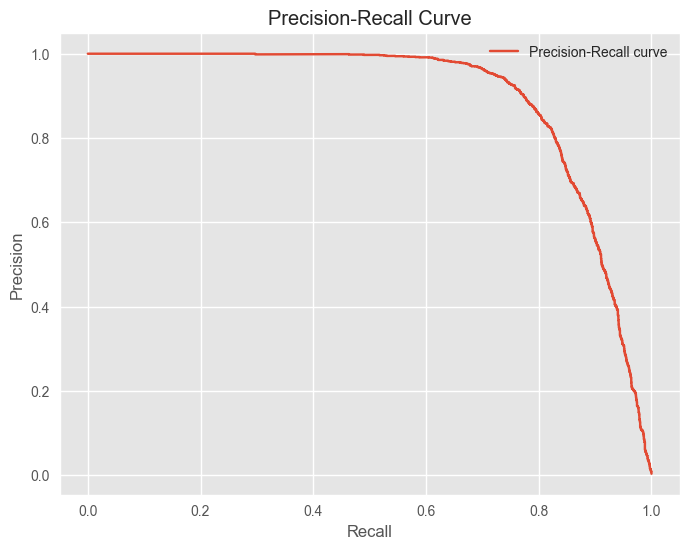

In [140]:

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


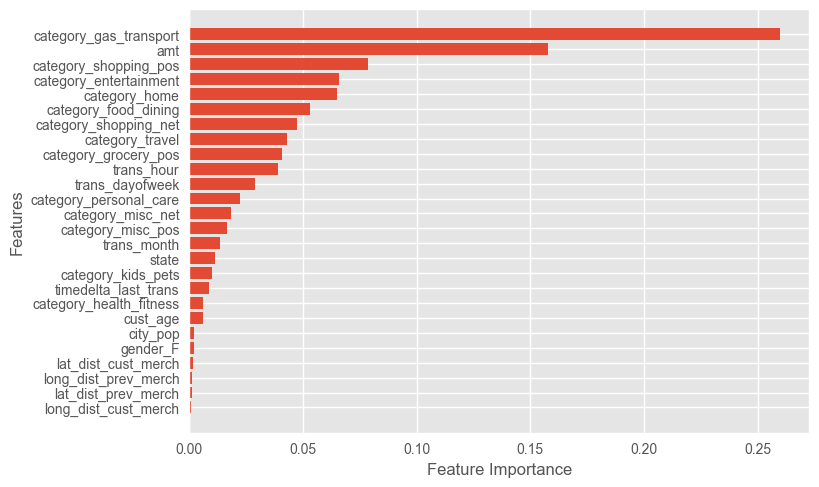

In [141]:
# Visualize feature importances
feature_names = np.array(X_resampled.columns)
sorted_indices = np.argsort(feature_importances)
plt.barh(range(len(feature_names)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_names)), feature_names[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

Choosing Features that can contribute to predict wether a transaction is fruad or not Heuristicly:

From dataset visulisation we noticed that not all featuers are contribtuing in prediction processs such as lat and long for different marchant categories.
AMOUNT, TRANSACTION HOUR, MARCHANT CATEGORY, TRANSACTION DAY OF WEEK are ones chosen Heuristicly to predict fraud.


In [174]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# SVM model_5 
model_5 = SVC(kernel='linear')
model_5.fit(X_resampled, y_resampled)

In [ ]:
# Make predictions on the testing data for SVM model
y_pred = model_5.predict(X_test)

# Calculate various evaluation metrics for SVM model
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)

In [ ]:
# Print the confusion matrix
print("Confusion matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
labels = ["Negative", "Positive"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [ ]:
# Obtain predicted probabilities for the positive class
y_scores = model_5.predict_proba(X_test)[:, 1]  # model_five SVM model

# Calculate AP score
ap_score = average_precision_score(y_test, y_scores)

# Print the AP score
print("Average Precision (AP) Score:", ap_score)

In [ ]:
# Calculate predicted probabilities for positive class
y_scores = model_5.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_scores)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:

# Logistic Regression model
model_6 = LogisticRegression()
model_6.fit(X_resampled, y_resampled)

In [ ]:
# Make predictions on the testing data for XGBoost model
y_pred = model_6.predict(X_test)

# Calculate various evaluation metrics for KNN model
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)

In [ ]:
# Print the confusion matrix
print("Confusion matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
labels = ["Negative", "Positive"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Obtain predicted probabilities for the positive class
y_scores = model_6.predict_proba(X_test)[:, 1]  # model_six logistic regression model

# Calculate AP score
ap_score = average_precision_score(y_test, y_scores)

# Print the AP score
print("Average Precision (AP) Score:", ap_score)

In [ ]:
# Calculate predicted probabilities for positive class
y_scores = model_6.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_scores)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [142]:
Heuristics_featrures = ['state', 'city_pop', 'trans_month',
       'timedelta_last_trans', 'cust_age',
       'lat_dist_cust_merch', 'long_dist_cust_merch', 'lat_dist_prev_merch',
       'long_dist_prev_merch', 'category_misc_net', 'category_gas_transport',
       'category_kids_pets',  'category_shopping_net',
       'category_food_dining', 'category_personal_care', 'category_entertainment',
       'category_shopping_pos', 'category_misc_pos', 'category_travel',
       'category_health_fitness', 'gender_F']

In [160]:
Heuristics_featrures = ['state', 'city_pop', 'trans_month',
       'timedelta_last_trans', 'cust_age',
       'lat_dist_cust_merch', 'long_dist_cust_merch', 'lat_dist_prev_merch',
       'long_dist_prev_merch', 'gender_F']

In [162]:
# form train data
heuristics_data = X_resampled.copy()


In [163]:
heuristics_data.drop(Heuristics_featrures, axis = 1, inplace = True)
heuristics_data.reset_index(drop=True, inplace = True)

In [164]:
heuristics_data.columns

Index(['amt', 'trans_hour', 'trans_dayofweek', 'category_misc_net',
       'category_gas_transport', 'category_kids_pets', 'category_home',
       'category_shopping_net', 'category_food_dining',
       'category_personal_care', 'category_grocery_pos',
       'category_entertainment', 'category_shopping_pos', 'category_misc_pos',
       'category_travel', 'category_health_fitness'],
      dtype='object')

In [165]:
heuristics_data.head()

,amt,trans_hour,trans_dayofweek,category_misc_net,category_gas_transport,category_kids_pets,category_home,category_shopping_net,category_food_dining,category_personal_care,category_grocery_pos,category_entertainment,category_shopping_pos,category_misc_pos,category_travel,category_health_fitness
0,0.057850,0.695652,0.092850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.401481,0.608696,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.247064,0.565217,0.092850,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.189708,0.521739,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.230951,0.739130,0.922061,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
# form test data
heuristics_test = X_test.copy()
heuristics_test.drop(Heuristics_featrures, axis = 1, inplace = True)
heuristics_test.reset_index(drop=True, inplace = True)

In [166]:
# Model five - Random Forest with heuristics

# Define the random forest classifier with hyperparameters
model_8 = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=30, class_weight={0: 20, 1: 1}, random_state=42)

model_8_spec = 'Random Forest | Normal H-Params'

# Train the random forest classifier on the resampled data
model_8.fit(heuristics_data, y_resampled)

RandomForestClassifier(class_weight={0: 20, 1: 1}, max_depth=30,
                       min_samples_split=30, random_state=42)

In [169]:
# Make predictions on the testing data
y_pred = model_8.predict(heuristics_test)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.9967339608687125
Precision: 0.5544914134742405
Recall: 0.7827505827505827
F1 score: 0.6491397641600618
Confusion matrix:
 [[552225   1349]
 [   466   1679]]


In [150]:
from sklearn.metrics import average_precision_score

# Obtain predicted probabilities for the positive class
y_scores = model_8.predict_proba(heuristics_test)[:, 1]  # model_five with the Random Forest model

# Calculate AP score
ap_score = average_precision_score(y_test, y_scores)

# Print the AP score
print("Average Precision (AP) Score:", ap_score)

Average Precision (AP) Score: 0.6030340008551425


Confusion matrix:
[[552264   1310]
 [   762   1383]]


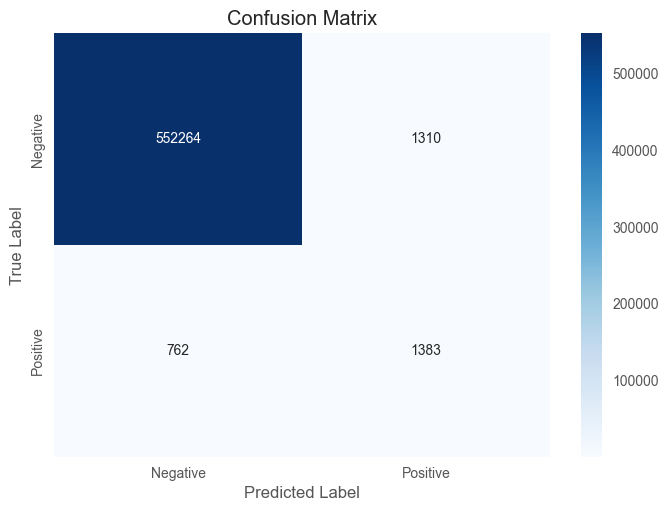

In [151]:
# Print the confusion matrix
print("Confusion matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
labels = ["Negative", "Positive"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [170]:
# Model 9 - KNN with heuritics data
# Define the KNN classifier with hyperparameters
model_9 = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')

model_three_spec = 'KNN | Normal H-Params'

# Train the KNN classifier on the resampled data
model_9.fit(heuristics_data, y_resampled)


KNeighborsClassifier(weights='distance')

In [171]:
# Make predictions on the testing data - KNN with heuritics data
y_pred = model_9.predict(heuristics_test)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)


Accuracy: 0.99019648419435
Precision: 0.26417249750107097
Recall: 0.8624708624708625
F1 score: 0.4044599912549191
Confusion matrix:
 [[548421   5153]
 [   295   1850]]


Confusion matrix:
[[548421   5153]
 [   295   1850]]


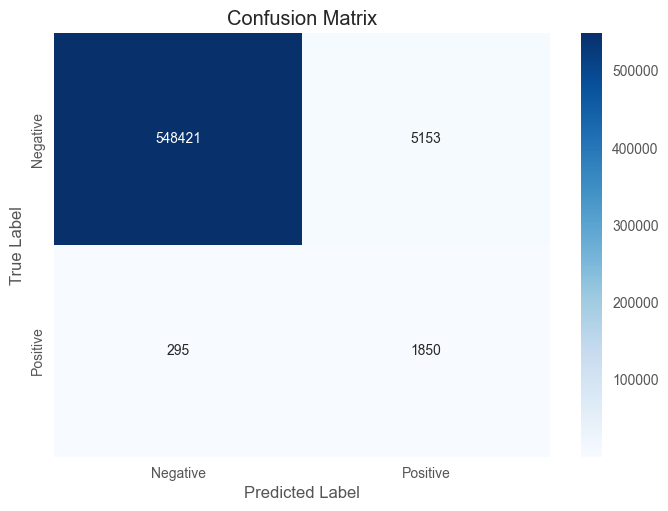

In [172]:
# Print the confusion matrix
print("Confusion matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
labels = ["Negative", "Positive"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [173]:
# Obtain predicted probabilities for the positive class
y_scores = model_9.predict_proba(heuristics_test)[:, 1]  # model_9 with KNN model

# Calculate AP score
ap_score = average_precision_score(y_test, y_scores)

# Print the AP score
print("Average Precision (AP) Score:", ap_score)

Average Precision (AP) Score: 0.4108205161647733


In [156]:
# Define the XGBoost classifier with hyperparameters with heuristics data
model_10 = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, objective='binary:logistic', random_state=42)

model_10_spec = 'XGBoost | Normal H-Params'

# Train the XGBoost classifier on the resampled data
model_10.fit(heuristics_data, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [157]:
# Make predictions on the testing data - XGBoost classifier 
y_pred = model_10.predict(heuristics_test)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.9852839294679505
Precision: 0.18528951486697964
Recall: 0.827972027972028
F1 score: 0.3028132992327366
Confusion matrix:
 [[545765   7809]
 [   369   1776]]


Confusion matrix:
[[545765   7809]
 [   369   1776]]


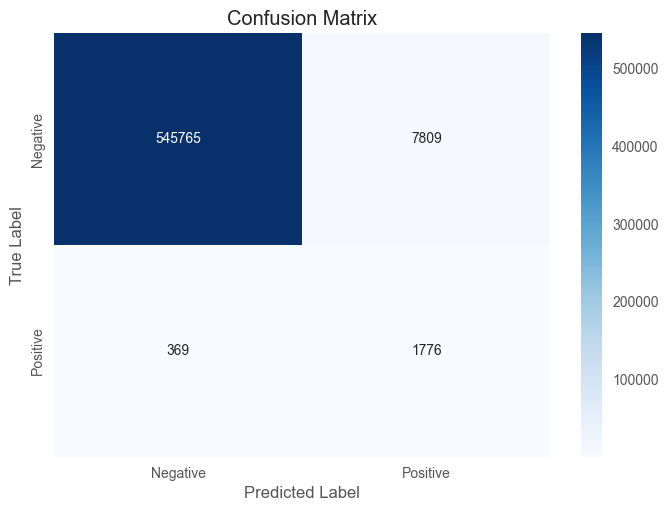

In [158]:
# Print the confusion matrix
print("Confusion matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
labels = ["Negative", "Positive"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [159]:
# Obtain predicted probabilities for the positive class
y_scores = model_8.predict_proba(heuristics_test)[:, 1]  # model_five with XGBoost model

# Calculate AP score
ap_score = average_precision_score(y_test, y_scores)

# Print the AP score
print("Average Precision (AP) Score:", ap_score)

Average Precision (AP) Score: 0.6178651121392187
